In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image
from nilearn import plotting 
from nilearn.connectome import ConnectivityMeasure
import nibabel as nib

path = "/Users/leoschild/Desktop/LEO/RSDS.nosync/100307_FIX/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_hp2000_clean.nii"
Nifti_img = nib.nifti1.load(path)
Bild = image.get_data(Nifti_img)

In [3]:
from nilearn import datasets
msdl_atlas = datasets.fetch_atlas_msdl(data_dir= None)
msdl_coords = msdl_atlas.region_coords
anzahl_regions = len(msdl_coords)

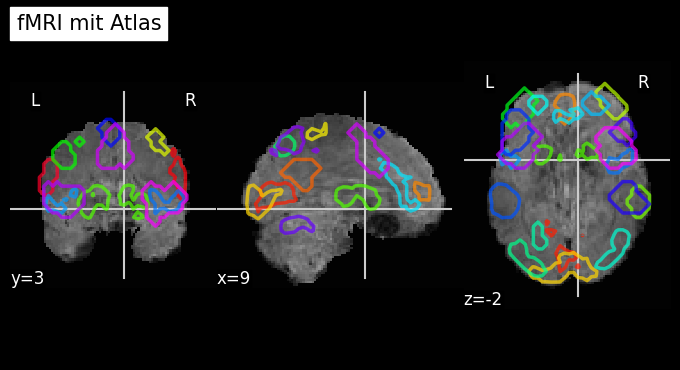

In [5]:
plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=Nifti_img.slicer[:, :, :, 120], title='fMRI mit Atlas')

In [25]:
import nilearn.maskers as maskers
masker = maskers.NiftiMapsMasker(msdl_atlas.maps, resampling_target="data").fit()

In [26]:
report = masker.generate_report(displayed_maps=[0,1,2,37,38])
report

/var/folders/z9/fw7pcckx2jscn_v8wc8q6ml80000gn/T/ipykernel_4287/3910315398.py:1: UserWarning: No image provided to fit in NiftiMapsMasker. Plotting only spatial maps for reporting.
  report = masker.generate_report(displayed_maps=[0,1,2,3,4,5,6,32,33,34,35,36,37,38])


In [23]:
roi_time_series = masker.transform(Nifti_img)
roi_time_series.shape

(1200, 39)

In [27]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]

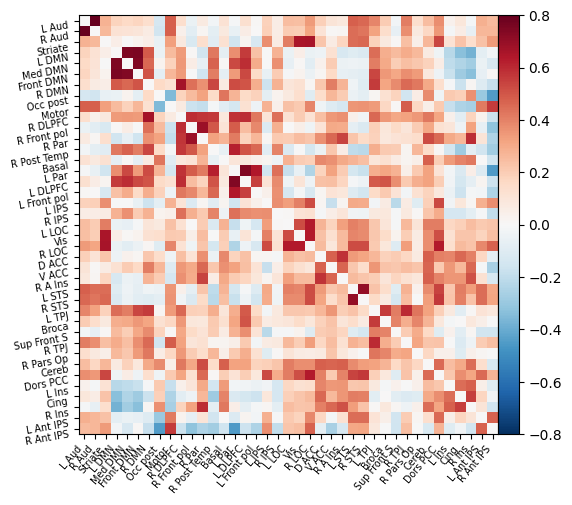

In [28]:
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=msdl_atlas.labels,vmax=0.8, vmin=-0.8, colorbar=True)

In [29]:
plotting.view_connectome(correlation_matrix, edge_threshold=0.2, node_coords=msdl_atlas.region_coords)